Implementation inspired by: https://www.kaggle.com/code/yassineghouzam/introduction-to-cnn-keras-0-997-top-6

# 0. Import packages

In [32]:
import matplotlib.pyplot as plt 
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# 1. Data preparation

## 1.1 Loading the data

#### Load the set of images and labels from the mnist dataset using Keras:
* When loading the dataset this way, it already is split into a training set (60000 images) and test set (10000)
* The dataset does not contain any missing values

In [61]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

#### Displaying some of the images:

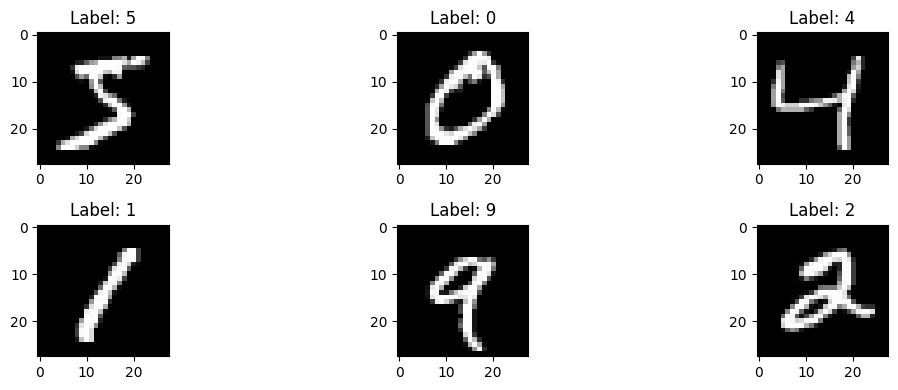

In [34]:
# Display a few example images
plt.figure(figsize=(12, 4))

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")

plt.tight_layout()
plt.show()

#### Reshape the images

In [62]:
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(X_train.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

#### Normalize images

In [63]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

#### Label encoding

In [64]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [49]:
Y_train.shape

(60000, 10)

#### Things to consider in this section:
* Reshaping the data (the data needs to be in a specific format before entering the model)
* Label encoding
* etc.

## 1.2 Data Augmentation
Apply techniques to diversify the diversity of our training data. Could for instance be: 
* Normalizing the images (for instance grayscale normalization)
* horizontal or vertical flips
* random crops 
* color jitters
* translations
* and more...

# 2. CNN

## 2.1 Defining the model
* Define all the layers, including Conv2D (convolutional layers), MaxPool2D (pooling layers), dropout layers, flatten layer and dense layer
* Decide upon things like the optimizer, loss function, batch size, number of epochs and so on. Maybe introduce early stopping (a mechanism that makes the training of the network stop automatically once the value of the loss starts increasing)

In [50]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


#### Set optimizer and compile

In [51]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

#### Set batch size and epochs

In [52]:
epochs = 1 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

# 3. Data augmentation and train

#### Data augmentation

In [53]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

#### Train the model

In [67]:
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

697/697 [==============================] - ETA: 0s - loss: 0.1340 - accuracy: 0.9596

ValueError: in user code:

    File "C:\Users\Magnus\.conda\envs\Bachelor\lib\site-packages\keras\engine\training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\Magnus\.conda\envs\Bachelor\lib\site-packages\keras\engine\training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Magnus\.conda\envs\Bachelor\lib\site-packages\keras\engine\training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\Magnus\.conda\envs\Bachelor\lib\site-packages\keras\engine\training.py", line 1667, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Magnus\.conda\envs\Bachelor\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\Magnus\.conda\envs\Bachelor\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Magnus\.conda\envs\Bachelor\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Magnus\.conda\envs\Bachelor\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Magnus\.conda\envs\Bachelor\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\Magnus\.conda\envs\Bachelor\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [66]:
history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_test, y_test), verbose = 1)

 13/698 [..............................] - ETA: 6:10 - loss: 0.5050 - accuracy: 0.8676

KeyboardInterrupt: 

## 2.2 Tuning the model - Magnus
We can tune are model to make sure that the hyperparameters we have chosen ensures opimal performance. Some hyperparameters that could be useful to tune (according to ChatGPT) are:
* Number of Convolutional layers
* Number of Filters
* Filter Size (Kernel Size)
* Pooling
* Dropout Rate
* Weight Initialization
* Data Augmentation
* and more...

# 3. Evaluation

#### Plotting training and validation loss

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True

#### Confusion matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In the example, they have used these techniques to evaluate the model:
* Training and validation curves
* Confusion matrix
* Displaying errors 